In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyexcel.cookbook import merge_all_to_a_book
from matplotlib.cbook import boxplot_stats
import glob
from matplotlib import cm

plt.rcParams["figure.figsize"]=20,10
plt.rcParams.update({'font.size': 28})
%load_ext autoreload

In [2]:
def plot(data):
    fig, ax = plt.subplots()
    if data.ndim == 1:
        a = plt.plot(data)
    else:
        a = plt.plot(data.columns, data.T)
    
#     plt.xticks([])
#     plt.title('Absorbance x Wavelength')
#     plt.xlabel('Wavelength')
#     plt.ylabel('Absorbance')

In [4]:
df = pd.read_csv('../data/final/sergio_treated.csv', index_col=0)

In [6]:
abs_data = df[['TREATMENT', 'SHELF-LIFE', 'BLOCK']+list(df.columns[14:])].copy()
qua_data = df[df.columns[:14]].copy()

In [9]:
attrs = qua_data.columns[3:].values

In [11]:
qua_data['index'] = qua_data['SHELF-LIFE'].astype(str) + qua_data['TREATMENT']

In [12]:
qua_data = qua_data.sort_values(by=['SHELF-LIFE','TREATMENT'])

In [13]:
qua_data[qua_data['TOTAL ACIDITY']>7]

,TREATMENT,BLOCK,SHELF-LIFE,FRESH MASS,L,C,H,FIRMNESS,LP,CP,HP,SST,TOTAL ACIDITY,DRY MASS,index
731,T6,B3,1,517.53,66.33,52.94,63.41,60.0,58.18,62.08,78.9,14.1,7.98,18.48,1T6


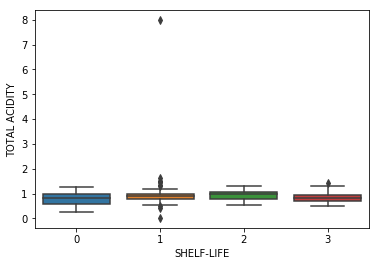

In [14]:
att = 'TOTAL ACIDITY'
ax = sns.boxplot(x='SHELF-LIFE', y=att, data=qua_data.drop(729))
ax.get_figure().savefig('../plots/shelf life/boxplot_%s' % att)

In [15]:
data = qua_data[qua_data['SHELF-LIFE']==1][abs_data['TREATMENT']=='T3']

/home/danielesreis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
shelf_dict = {0: 'r', 1: 'b', 2: 'g', 3: 'y'}
treat_dict = {'T3': 'r', 'T4': 'b', 'T5': 'g', 'T6': 'y'}
block_dict = {'B1': 'r', 'B2': 'b', 'B3': 'g'}

In [17]:
qua_data['color_shelf'] = qua_data['SHELF-LIFE'].map(shelf_dict).values
qua_data['color_treat'] = qua_data['TREATMENT'].map(treat_dict).values
qua_data['color_block'] = qua_data['BLOCK'].map(block_dict).values

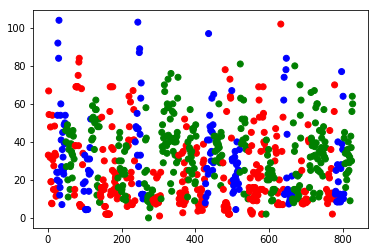

In [18]:
plt.scatter(qua_data.index, qua_data['FIRMNESS'], c=qua_data['color_block'])